In [39]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import acquire

# Store Items Data Exercises

## Exercise 1

Convert date column to datetime format.

In [40]:
# use a function to pull in data
df = acquire.get_store_data()
df.head()

,item_id,sale_amount,sale_date,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253


In [41]:
# convert sale_data column to datetime
df.sale_date = pd.to_datetime(df.sale_date)

## Exercise 2

Plot the distribution of sale_amount and item_price.

<AxesSubplot:>

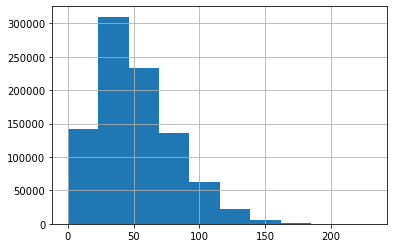

In [42]:
# plot the distribution of sale_amount
df.sale_amount.hist()

<AxesSubplot:>

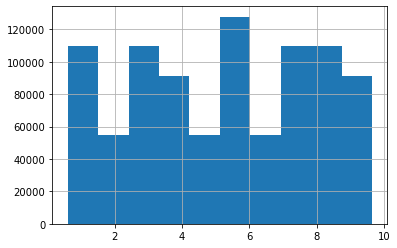

In [43]:
# plot the distribution of item_price
df.item_price.hist()

## Exercise 3

Set the index to be the datetime variable.

In [44]:
# set sale data as index and sort
df = df.set_index("sale_date").sort_index()

## Exercise 4

Add a 'month' and 'day of week' column to your dataframe.

In [45]:
# use assign to create 'month' and 'day of week' columns
df = df.assign(month = df.index.strftime('%B'), day_of_week = df.index.strftime('%A'))
df.head(3)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday


## Exercise 5

Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [46]:
df['sales_total'] = df.sale_amount * df.item_price
df.head(2)

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,218.40


## Exercise 6

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [47]:
def prepare_store_data():
    # use a function to pull in data
    df = acquire.get_store_data()
    # convert sale_data column to datetime
    df.sale_date = pd.to_datetime(df.sale_date)
    # set sale data as index and sort
    df = df.set_index("sale_date").sort_index()
    
    # use assign to create additional columns
    df = df.assign(month = df.index.strftime('%B'), 
                   day_of_week = df.index.strftime('%A'),
                  sales_total = df.sale_amount * df.item_price)
    
    return df

In [48]:
# check function
df = prepare_store_data()
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,January,Tuesday,10.92
2013-01-01 00:00:00+00:00,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,218.40
2013-01-01 00:00:00+00:00,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,January,Tuesday,125.55
2013-01-01 00:00:00+00:00,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,January,Tuesday,453.60
2013-01-01 00:00:00+00:00,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,January,Tuesday,294.00


# OPS Data Exercises

In [49]:
# use function to pull in data
df = acquire.acquire_open_power_systems_data()
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [50]:
# check size of dataframe
df.shape

(4383, 5)

## Exercise 1

Convert date column to datetime format.

In [52]:
# change date column format
df.Date = pd.to_datetime(df.Date)
df.head(2)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN


In [19]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


## Exercise 2

Plot the distribution of each of your variables.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

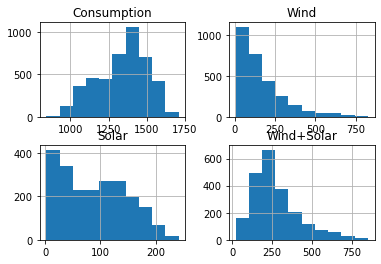

In [36]:
# plot distribution
df.hist()
plt.tight_layout

## Exercise 3

Set the index to be the datetime variable.

In [32]:
# set sale data as index and sort
df = df.set_index("Date").sort_index()

## Exercise 4

Add a month and a year column to your dataframe.

In [33]:
# use assign to create new columns
df = df.assign(month = df.index.strftime('%B'), year = df.index.strftime('%Y'))
df.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006


## Exercise 5

Fill any missing values.

In [37]:
# check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
 4   month        4383 non-null   object 
 5   year         4383 non-null   object 
dtypes: float64(4), object(2)
memory usage: 239.7+ KB


In [53]:
# fill wind/solar nulls with 0 since there could be days of no wind or sun
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         4383 non-null   float64       
 3   Solar        4383 non-null   float64       
 4   Wind+Solar   4383 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


## Exercise 6

Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [54]:
def prepare_ops_data():
    
    # use function to pull in data
    df = acquire.acquire_open_power_systems_data()
    # change date column format
    df.Date = pd.to_datetime(df.Date)
    # set sale data as index and sort
    df = df.set_index("Date").sort_index()
    
    # use assign to create new columns
    df = df.assign(month = df.index.strftime('%B'), year = df.index.strftime('%Y'))
    # fill wind/solar nulls with 0 since there could be days of no wind or sun
    df = df.fillna(0)
    
    return df

In [55]:
df = prepare_ops_data()
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006
